In [1]:
import sys
sys.path.append('..')
import ugent

In [19]:
from strands import Schrodinger2D, Rectangle, Circle
import numpy as np
import math

c = 51

def V(x, y):
    return (x**2 + 1) * (y**2 + 1)

s = Schrodinger2D(V, Rectangle(-5.5,5.5, -5.5,5.5),
                  gridSize=(50, 50), maxBasisSize=40)
extremely_accurate = s.eigenvalues(60, shiftInvert=True, tolerance=1e-14)[:c]
extremely_accurate

[3.195918085200301,
 5.526743874394976,
 5.5267438743950805,
 7.557803326786445,
 8.031272340314223,
 8.444581361569835,
 9.928061056949586,
 9.928061056949717,
 11.311817050617663,
 11.311817050617776,
 12.103253578685644,
 12.201178967932128,
 13.332331271155411,
 14.348268532837466,
 14.348268532837821,
 14.45047872198137,
 14.580556315595686,
 16.15141922453231,
 16.151419224532376,
 16.51719245967105,
 16.564871922134593,
 17.89457827787159,
 17.894578277871975,
 18.583391734457596,
 18.756204247855436,
 18.75620424785563,
 18.976194433412942,
 19.594475109965728,
 20.735768021123373,
 20.92016419705394,
 21.293111884690944,
 21.293111884691022,
 21.51221785282101,
 21.644284091777315,
 22.61638529123716,
 22.616385291237528,
 23.216764647867805,
 23.21676464786797,
 23.753167662236507,
 23.926306773089337,
 24.88699263175104,
 25.020038601789107,
 25.20272070565884,
 25.20272070565892,
 25.602894449731004,
 26.325525153691938,
 26.392752336565657,
 26.392752336565735,
 26.4438458

In [14]:
reported = np.array([3.1959181, 5.5267439, 5.5267439, 7.5578033, 8.0312723, 8.4445814, 9.9280611, 9.9280611, 11.3118171, 11.3118171, 12.1032536, 12.2011790, 13.3323313])

(reported - np.array(extremely_accurate)[:len(reported)])*10**8

array([ 1.47999639,  2.56050958,  2.56050461, -2.67864451, -4.03142142,
        3.84300503,  4.30491571,  4.30491163,  4.93818231,  4.93817982,
        2.12954898,  3.20456213,  2.88446831])

In [26]:
from tqdm import tqdm
from itertools import product

data = {}

ks = [10, 20, 30]
ns = [20, 30, 40]
for k, n in tqdm(list(product(ks, ns))):
    s = Schrodinger2D(V, Rectangle(-5.5,5.5, -5.5,5.5),
                      gridSize=(n, n), maxBasisSize=k)
    data[(n, k)] = np.array(s.eigenvalues(c+10, tolerance=1e-12, shiftInvert=True)[:c])

100%|██████████████████████████████| 9/9 [00:06<00:00,  1.31it/s]


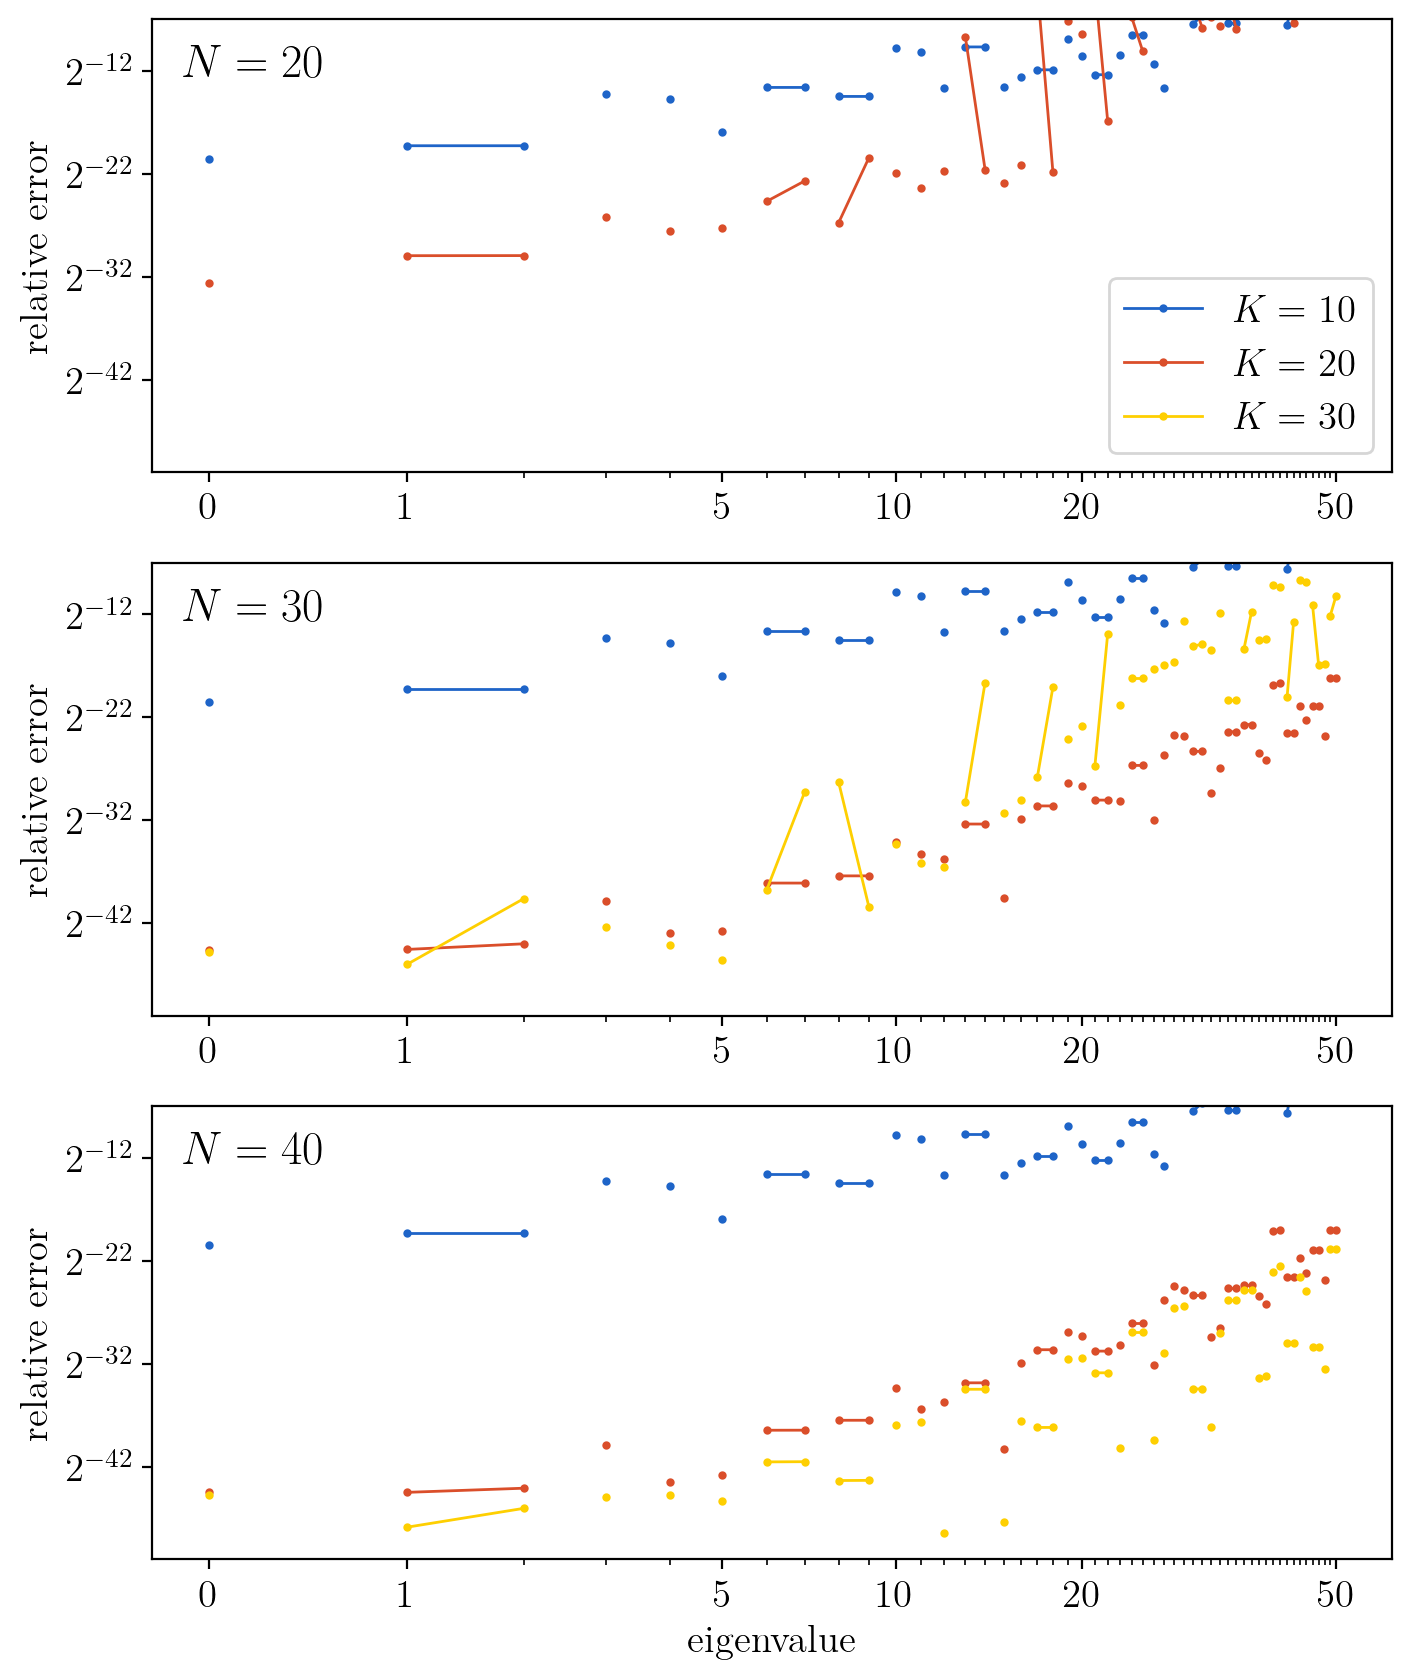

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FormatStrFormatter, ScalarFormatter


fig, axes = plt.subplots(3, 1, figsize=(8, 10), dpi=200)

mults = [1]
for i in range(1, c):
    if abs(extremely_accurate[i-1] - extremely_accurate[i]) < 1e-8:
        mults[-1] += 1
    else:
        mults.append(1)

for ni, n in enumerate(ns):
    ax = axes[ni]
    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=2)
    xticks = [1, 2, 6, 11, 21, 51]
    ax.set_xticks(xticks, labels=[f"{x-1}" for x in xticks])
    ax.set_xticks(range(1, 51), labels=[], minor=True)
    ax.set_ylim(2**-51, 2**-7)
    ax.set_ylabel("relative error")
    if ni == 2:
        ax.set_xlabel("eigenvalue")

    for i, k in enumerate(ks):
        if k > n:
            continue
        j = 0
        r = np.abs((data[(n, k)] - extremely_accurate)/extremely_accurate)
        kwargs = dict(
            label=f"$K={k}$",
            color=ugent.palet[i],
            marker='.', ls='-', lw=1, markersize=4,
        )
        for mult in mults:
            d = r[j:j+mult]
            ax.plot(range(j + 1, j+len(d)+1), d, **kwargs)
            if j == 0:
                del kwargs["label"]
            j += mult
            if j >= len(r):
                break

    ax.set_title(f"$N = {n}$", y=0.835, x=0.025, loc="left")


axes[0].legend(*axes[2].get_legend_handles_labels(), loc="lower right")
    
fig.show()
plt.savefig(f"nm_test_ixaru.pdf", bbox_inches="tight")

In [25]:
print(data[48, 36][-1])
print(extremely_accurate[-1])

27.174903824669723
27.17490569672226


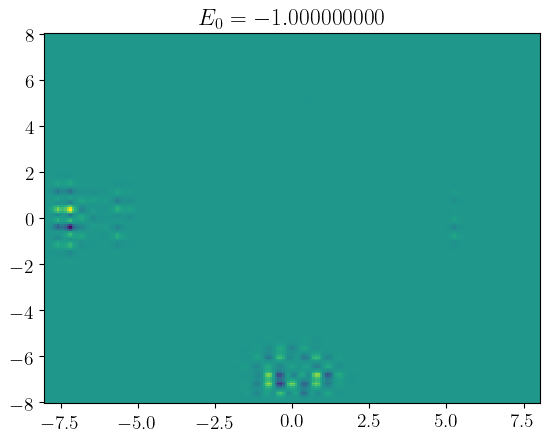

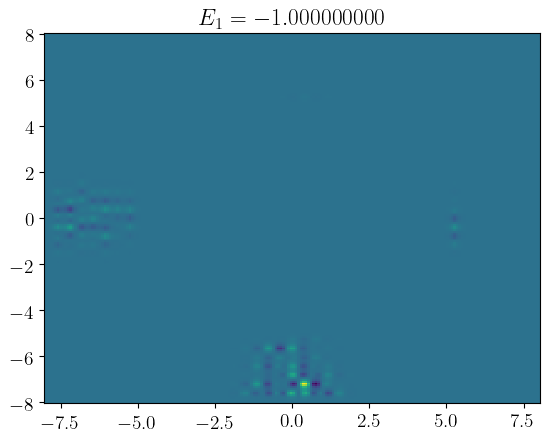

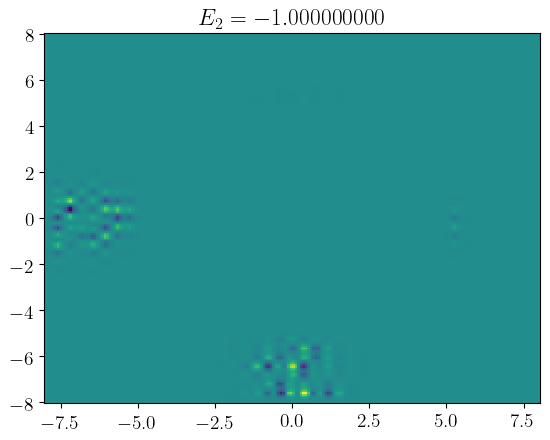

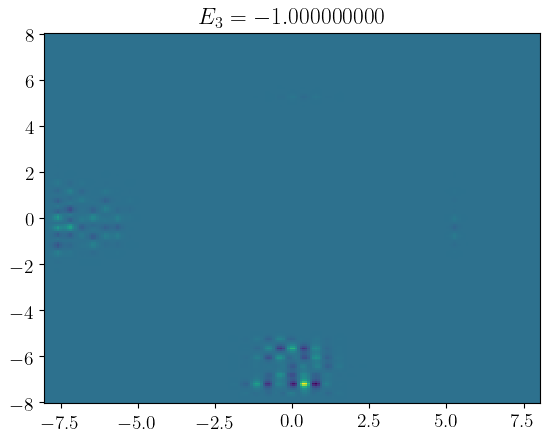

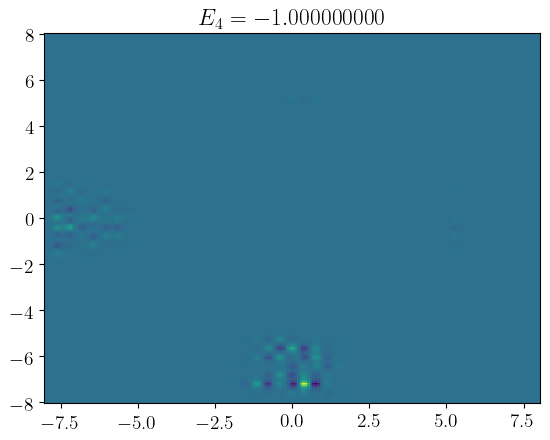

In [39]:
from strands import Schrodinger2D, Rectangle

def V(x, y):
    return (x**2 + 1) * (y**2 + 1)

s = Schrodinger2D(V, Rectangle(-8,8, -8,8),
                  gridSize=(40, 40), maxBasisSize=30)

xs = np.linspace(-8,8, 200)
X, Y = np.meshgrid(xs, xs)
for i, (E, f) in enumerate(s.eigenfunctions(5, shiftInvert=True)):
    plt.pcolormesh(X, Y, f(X, Y))
    plt.title(f"$E_{{{i}}} = {E:.9f}$")
    plt.show()